In [83]:
#Angel Favian Minga
#16 de julio 2020
import numpy as np
import random as rnd
import pandas as pd
import matplotlib as plt1
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#jugadores
jug1="Angel"
jug2="Luis"

#instancias
i1=0.5  #la otra no la escribo ya que se solo hay dos rangos

#probabilidad
C1=0#'c'
C2=1#'s'

size=50; #tamaño
size1=100; #tamaño
size2=150; #tamaño

In [85]:
#gnerador num aleatorios
def gen_num():
    return rnd.random()
#generar aleatorio entre 0 y 1 para cara o sello segun el jugador
def gen_dist_uni():
    x=rnd.random()
    if x>=i1:
        return 1
    else:
        return 0

In [86]:
#genera los numeros aleatorios de los lanzamientos de la moneda
def get_label(X):
    if X>0 and X<=i1:
        return C1
    if X>i1 and X<=1:
        return C2

# se crea 3 matriz con elementos cero de 50x7, 100x7 y 150x7

In [87]:
# [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
md=np.zeros((size,7))
md100=np.zeros((size1,7))
md150=np.zeros((size2,7))

In [88]:
#llenar matriz con datos de los jugadores y los tres tiros de la moneda
def llenar_matriz(matriz,tam):
    # [0] Jugador1 [1] jugador2 [2]T1  [3]T2  [4]T3   [5]j1 loss=0/win=1  [6]j2 loss=0/win=1 
       #0=cara     1=sello
    for i in range(tam):
        cs=gen_dist_uni()
        for j in range(5):
            if j==0:
                matriz[i,j]=cs
            else:
                if j==1:
                    matriz[i,j]=abs(cs-1)
                else:
                    matriz[i,j]=get_label(gen_num())

In [89]:
llenar_matriz(md,size)
llenar_matriz(md100,size1)
llenar_matriz(md150,size2)

In [90]:
#md
#   A    L   T1  T2  T3  A   L

In [91]:
#md100

In [92]:
#md150

In [93]:
#metodo para verificar si uno de los jugadores gana o pierde segun lo que escoja sello o cara
def verifica_gana(val1,val2,val3):
    if val1==val3: #md[i,2]
        return 1 #md[i,0]
    if val2==val3:
        return 0 #md[i,1]

In [94]:
#metodo para asignar valores a las columnas  5 y 6 determinado si gana o pierde e jugador 1 o jugador 2
def asigna_gana(matriz,val,i):
    if val==0:
        matriz[i,5]=0
        matriz[i,6]=1
    else:
        matriz[i,5]=1
        matriz[i,6]=0

# Se evalua los datos determinando el ganador de la ronda

In [95]:
def compara_datos_tiros(matriz,tam):
    #verifica quien gana o pierde
    for i in range (tam):
 #|[i,0]Jugador1 || [i,1]Jugador2 || [i,2]T1   || [i,3]T2 || [i,4]T3 ||[i,5]J1 loss/win ||[i,6]J2 loss/win
        if  matriz[i,2]==matriz[i,3] and matriz[i,2]==matriz[i,4]:
                                # J1          J2           Valor=C/s
            valor=verifica_gana(matriz[i,0],matriz[i,1],matriz[i,2])
            asigna_gana(matriz,valor,i)
        elif matriz[i,2]==matriz[i,3] or matriz[i,2]==matriz[i,4]:
                                 # J1          J2           Valor=C/s
            valor=verifica_gana(matriz[i,0],matriz[i,1],matriz[i,2])
            asigna_gana(matriz,valor,i)
        elif matriz[i,3]==matriz[i,4]:
                                 # J1          J2           Valor=C/s
            valor=verifica_gana(matriz[i,0],matriz[i,1],matriz[i,3])
            asigna_gana(matriz,valor,i)

In [96]:
# Prueba con 50 datos
compara_datos_tiros(md,size)
# Prueba con 100 datos
compara_datos_tiros(md100,size1)
# Prueba con 150 datos
compara_datos_tiros(md150,size2)

In [97]:
#md
#    A   L   T1  T2  T3  A   L

In [98]:
#md100
#    A   L   T1  T2  T3  A   L

In [99]:
#md100
#    A   L   T1  T2  T3  A   L

In [100]:
df50=pd.DataFrame(md)
df100=pd.DataFrame(md100)
df150=pd.DataFrame(md150)

In [101]:
TG1_jg50= df50[5].sum()
TG2_jg50= df50[6].sum()
TG1_jg100= df100[5].sum()
TG2_jg100= df100[6].sum()
TG1_jg150= df150[5].sum()
TG2_jg150= df150[6].sum()
print("________Prueba con 50 datos_____________")
print("Jugador %s  gano  %s veces" %(jug1,TG1_jg50))
print("Jugador %s  gano  %s veces" %(jug2,TG2_jg50))
print("________Prueba con 100 datos____________")
print("Jugador %s  gano  %s veces" %(jug1,TG1_jg100))
print("Jugador %s  gano  %s veces" %(jug2,TG2_jg100))
print("________Prueba con 150 datos____________")
print("Jugador %s  gano  %s veces" %(jug1,TG1_jg150))
print("Jugador %s  gano  %s veces" %(jug2,TG2_jg150))

________Prueba con 50 datos_____________
Jugador Angel  gano  20.0 veces
Jugador Luis  gano  30.0 veces
________Prueba con 100 datos____________
Jugador Angel  gano  51.0 veces
Jugador Luis  gano  49.0 veces
________Prueba con 150 datos____________
Jugador Angel  gano  81.0 veces
Jugador Luis  gano  69.0 veces


In [102]:
#df50

In [103]:
df_t = pd.DataFrame({'Jugador': [jug1,jug2], '50': [TG1_jg50,TG2_jg50],'100': [TG1_jg100,TG2_jg100],'150': [TG1_jg150,TG2_jg150]},columns=['Jugador', '50', '100', '150'])

In [104]:
df_t

Jugador    50   100   150
0   Angel  20.0  51.0  81.0
1    Luis  30.0  49.0  69.0

# Grafica de las ganancias de los jugadores con datos de 50,100,150

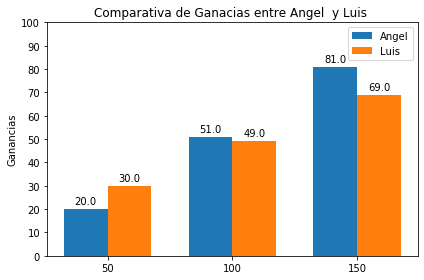

In [116]:
subject=['50', '100', '150']
dataset=df_t.groupby('Jugador')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,110,10)
#print(dataset.T)
jugador1_datos=list(dataset.T[jug1])
jugador2_datos=list(dataset.T[jug2])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, jugador1_datos, width, label=jug1)
rects2 = ax.bar(x + width/2, jugador2_datos, width, label=jug2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ganancias')
ax.set_title('Comparativa de Ganacias entre %s  y %s ' %(jug1,jug2))
ax.set_xticks(x)
ax.set_xticklabels(subject)
# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Datos para graficar los tiros de la moneda

In [106]:
T1_50= df50[2].sum()
T2_50= df50[3].sum()
T3_50= df50[4].sum()
T1_100= df100[2].sum()
T2_100= df100[3].sum()
T3_100= df100[4].sum()
T1_150= df150[2].sum()
T2_150= df150[3].sum()
T3_150= df150[4].sum()

In [107]:
df_CS50 = pd.DataFrame({'Cara/Sello': ['Sello','Cara'], 'T1': [T1_50,(size-T1_50)],'T2': [T2_50,(size-T2_50)],'T3': [T3_50,(size-T3_50)]},columns=['Cara/Sello', 'T1', 'T2', 'T3'])

In [108]:
df_CS100 = pd.DataFrame({'Cara/Sello': ['Sello','Cara'], 'T1': [T1_100,(size1-T1_100)],'T2': [T2_100,(size1-T2_100)],'T3': [T3_100,(size1-T3_100)]},columns=['Cara/Sello', 'T1', 'T2', 'T3'])

In [109]:
df_CS150 = pd.DataFrame({'Cara/Sello': ['Sello','Cara'], 'T1': [T1_150,(size2-T1_150)],'T2': [T2_150,(size2-T2_150)],'T3': [T3_150,(size2-T3_150)]},columns=['Cara/Sello', 'T1', 'T2', 'T3'])

In [110]:
df_CS50

Cara/Sello    T1    T2    T3
0      Sello  27.0  27.0  22.0
1       Cara  23.0  23.0  28.0

In [111]:
df_CS100

Cara/Sello    T1    T2    T3
0      Sello  49.0  55.0  51.0
1       Cara  51.0  45.0  49.0

In [112]:
df_CS150

Cara/Sello    T1    T2    T3
0      Sello  84.0  71.0  70.0
1       Cara  66.0  79.0  80.0

# Grafica de 50

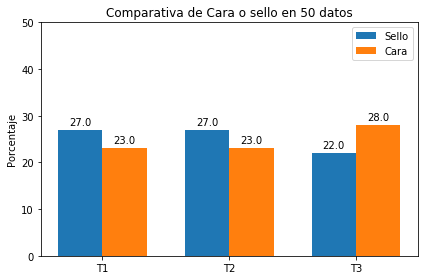

In [113]:
subject=['T1', 'T2', 'T3']
dataset=df_CS50.groupby('Cara/Sello')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,60,10)
#print(dataset.T)
sello=list(dataset.T["Sello"])
cara=list(dataset.T["Cara"])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sello, width, label="Sello")
rects2 = ax.bar(x + width/2, cara, width, label="Cara")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje')
ax.set_title('Comparativa de Cara o sello en 50 datos')
# inserting x axis label
ax.set_xticks(x)
ax.set_xticklabels(subject)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Grafica de 100

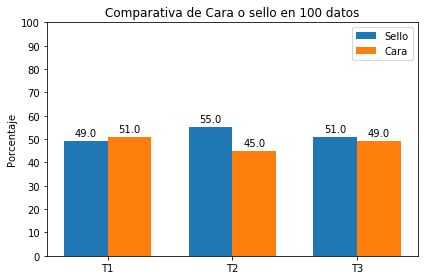

In [114]:
subject=['T1', 'T2', 'T3']
dataset=df_CS100.groupby('Cara/Sello')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,110,10)
#print(dataset.T)
sello=list(dataset.T["Sello"])
cara=list(dataset.T["Cara"])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sello, width, label="Sello")
rects2 = ax.bar(x + width/2, cara, width, label="Cara")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje')
ax.set_title('Comparativa de Cara o sello en 100 datos')
# inserting x axis label
ax.set_xticks(x)
ax.set_xticklabels(subject)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Grafica de 150

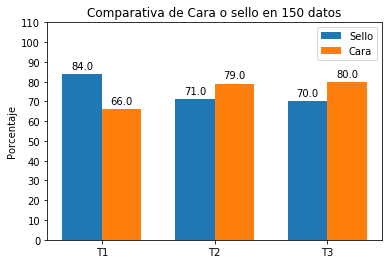

In [115]:
subject=['T1', 'T2', 'T3']
dataset=df_CS150.groupby('Cara/Sello')[subject].mean()
#print(dataset)
x=np.arange(len(subject))
width = 0.35  # the width of the bars
score_label=np.arange(0,120,10)
#print(dataset.T)
sello=list(dataset.T["Sello"])
cara=list(dataset.T["Cara"])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sello, width, label="Sello")
rects2 = ax.bar(x + width/2, cara, width, label="Cara")
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Porcentaje')
ax.set_title('Comparativa de Cara o sello en 150 datos')

# inserting x axis label
ax.set_xticks(x)
ax.set_xticklabels(subject)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

autolabel(rects1)
autolabel(rects2)

plt.show()